In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.rcParams['figure.figsize']=[15,6]

import warnings
warnings.filterwarnings('ignore')

# Problem Statement
A key challenge for the insurance industry is to charge each customer an appropriate premium for the risk they represent. The ability to predict a correct claim amount has a significant impact on insurers' management decisions and financial statements. Predicting the cost of claims in an insurance company is a real-life problem that needs to be solved in a more accurate and automated way. Several factors determine the cost of claims based on health factors like BMI, age, smoking, health conditions and others. Insurance companies apply numerous techniques for analysing and predicting health insurance costs.




In [3]:
# Data Definition
•	age: Age of the policyholder (Numeric)
•	sex: Gender of the policyholder (Categoric)
•	weight: Weight of the policyholder (Numeric)
•	BMI: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight (Numeric)
•	no_of_dependents: Number of dependent persons on the policyholder (Numeric)
•	smoker: Indicates policyholder is a smoker or a non-smoker (non-smoker=0;smoker=1) (Categoric)
•	claim: The amount claimed by the policyholder (Numeric) in dollars
•	blood pressure: Blood pressure reading of policyholder (Numeric)
•	diabetes: Indicates policyholder suffers from diabetes or not (non-diabetic=0; diabetic=1) (Categoric)
•	regular_ex: A policyholder regularly exercises or not (no-exercise=0; exercise=1) (Categoric)
•	job_title: Job profile of the policyholder (Categoric)
•	city: The city in which the policyholder resides (Categoric) 
•	hereditary_diseases: A policyholder suffering from hereditary diseases or not (Categoric)


SyntaxError: invalid character in identifier (<ipython-input-3-5eb62d7a0766>, line 2)

In [2]:
df = pd.read_csv('healthinsurance.csv')

In [5]:
(df.isnull().sum() / df.shape[0]) * 100

age                    2.640000
sex                    0.000000
weight                 0.000000
bmi                    6.373333
hereditary_diseases    0.000000
no_of_dependents       0.000000
smoker                 0.000000
city                   0.000000
bloodpressure          0.000000
diabetes               0.000000
regular_ex             0.000000
job_title              0.000000
claim                  0.000000
dtype: float64

# Roadmap

* Univariate Analysis
* Bivariate Analysis
* Missing values treatment
* Outlier Analysis - In insurance, we do not remove the outliers
* Feature Engineering

# Model Building

* Statistical Model of Linear Regression - R2, MAE, MSE, RMSE, & MAPE.
* Using SKlearn - Ridge, Lasso, Elastic Net, Net Models, SGD
* Cross validation


In [8]:
health.shape

(15000, 13)

In [10]:
#Info
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


In [11]:
# We need to convert the Smoker and Regular_ex into object

In [13]:
health.select_dtypes(include = np.number).columns

Index(['age', 'weight', 'bmi', 'no_of_dependents', 'smoker', 'bloodpressure',
       'diabetes', 'regular_ex', 'claim'],
      dtype='object')

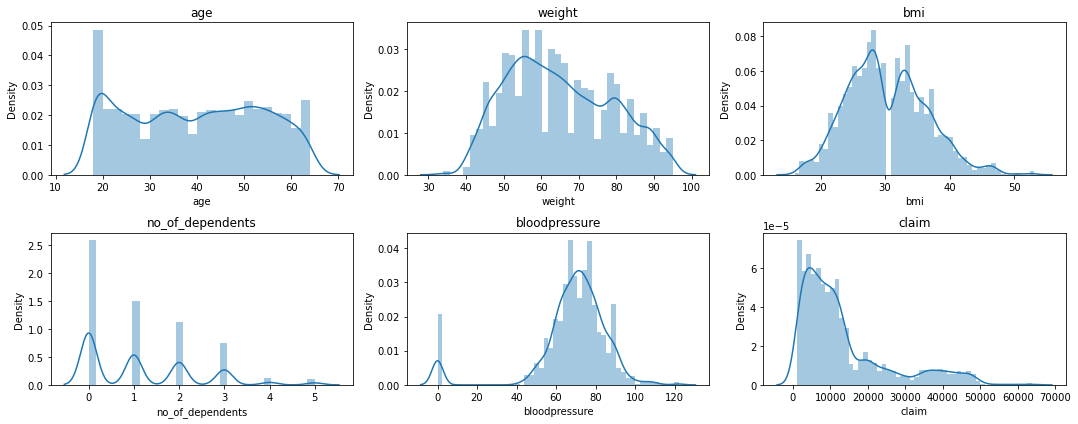

In [16]:
num_cols = ['age', 'weight', 'bmi', 'no_of_dependents', 'bloodpressure','claim']

nrows = 2
ncols = 3
iterator = 1

for i in num_cols:
    plt.subplot(nrows,ncols, iterator)
    sns.distplot(health.loc[:,i])   # distplot will return the shape of the data
    plt.title(i)
    iterator+=1

plt.tight_layout()
plt.show()

In [17]:
# Blood pressure has a lot od zeroes so has to be handled
# Age is Uniformly Distributed
# BMI appears to be Bimodal in Nature
# Weight is also somewhat normal in shape
# No. of dependents vary from 0 to 5.
# Bloodpressure, although is normal however, there are lts of )s
# Claim is positively skewed

In [23]:
health.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


In [20]:
# Done for less number of categories in a column
health.select_dtypes(exclude = np.number).columns

Index(['sex', 'hereditary_diseases', 'city', 'job_title'], dtype='object')

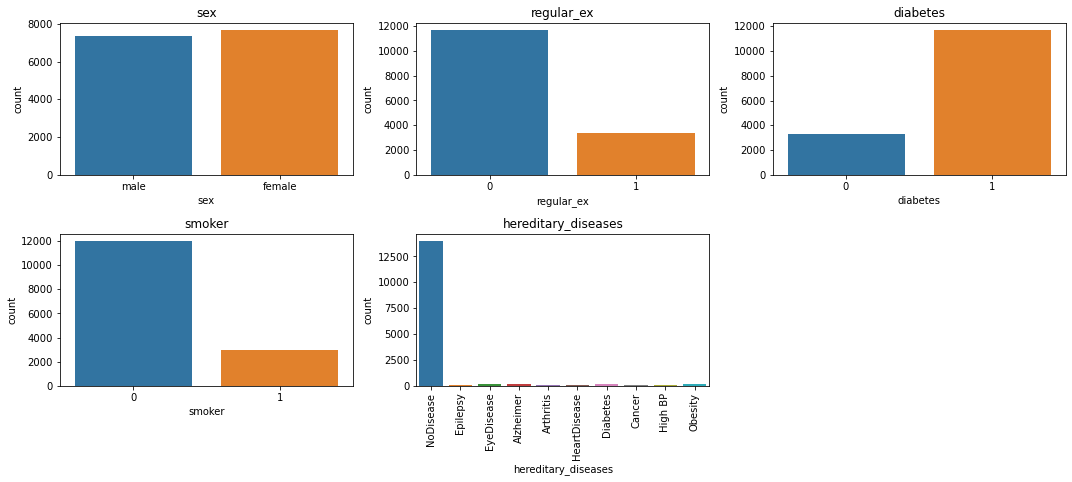

In [25]:
cat_cols = ['sex','regular_ex', 'diabetes','smoker' , 'hereditary_diseases']
nrows = 2
ncols = 3
iterator = 1

for i in cat_cols:
    plt.subplot(nrows,ncols, iterator)
    sns.countplot(health.loc[:,i])   # distplot will return the shape of the data
    plt.title(i)
    iterator+=1

plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

* More Females than Males
* Most of the people who got the Insurance are Diabetic mostly
* People as per this data are not smokers.
* Most of the people dont have any hereditary diseases
* People dont excercise => High BMI and more weight
**Note: ESC+m ->markdown ESC+y ->code

In [26]:
# Check job title
health.job_title.value_counts()[:5].index

Index(['Student', 'HomeMakers', 'Singer', 'Actor', 'FilmMaker'], dtype='object')

In [27]:
# Check cities
health.city.value_counts()[:5].index

Index(['NewOrleans', 'Nashville', 'Charleston', 'Brimingham', 'Memphis'], dtype='object')

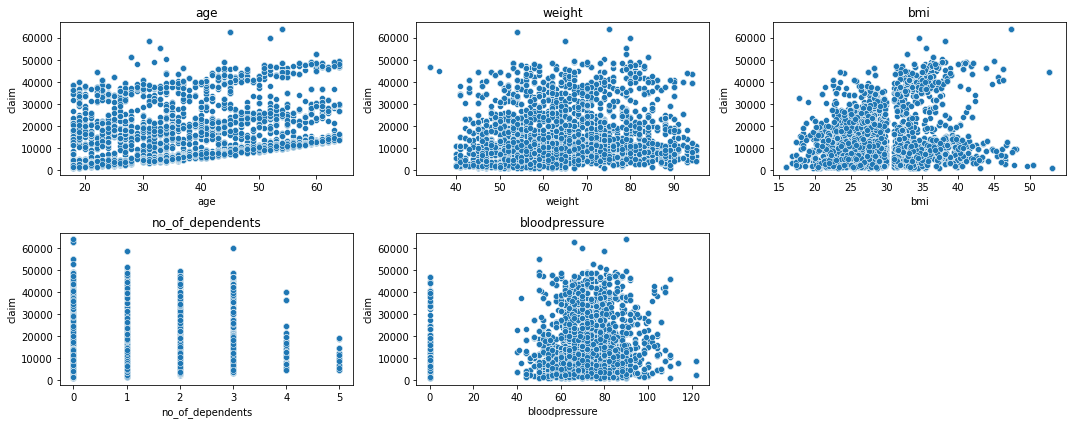

In [29]:
# Bivariate Analysis

num_cols = ['age', 'weight', 'bmi', 'no_of_dependents', 'bloodpressure']

nrows=2
ncols=3
iterator=1

for i in num_cols:
    plt.subplot(nrows,ncols,iterator)
    sns.scatterplot(health.loc[:,i],health.claim)
    plt.title(i)
    iterator+=1

plt.tight_layout()
plt.show()
    

* As Age increases , Claims also increases
* As BMI increases, the Claim Amounts have an increasing pattern
* In case of no. of dependents, as the dependents increases, the claim amounts decreases.
* In Blood pressure, we have lots of 0s....we need to fix that.
* Between weight and Claim, there is no pattern as such.

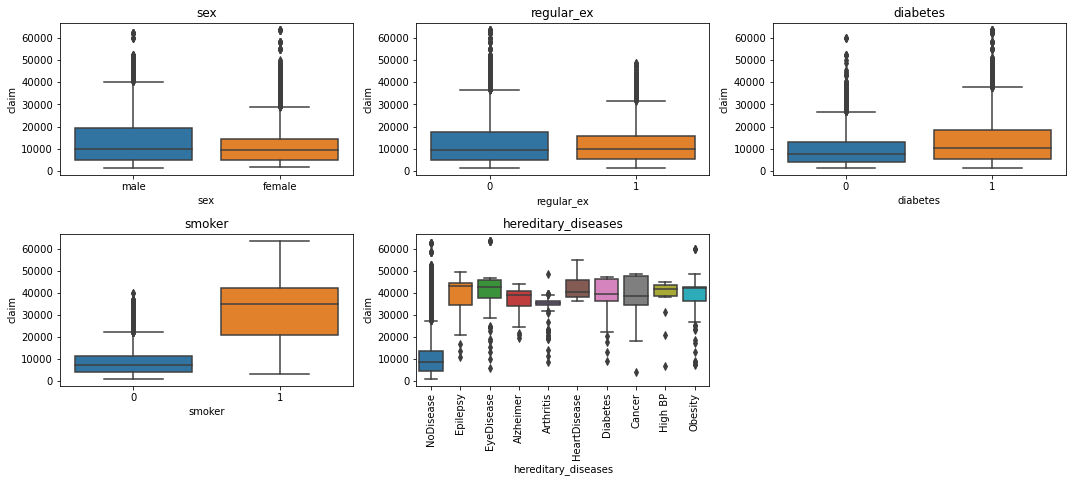

In [30]:
# Bivariate Analysis - Cat vs Num

cat_cols = ['sex','regular_ex', 'diabetes','smoker' , 'hereditary_diseases']
nrows = 2
ncols = 3
iterator = 1

for i in cat_cols:
    plt.subplot(nrows,ncols, iterator)
    sns.boxplot(health.loc[:,i], health.claim)   # distplot will return the shape of the data
    plt.title(i)
    iterator+=1

plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='city', ylabel='claim'>

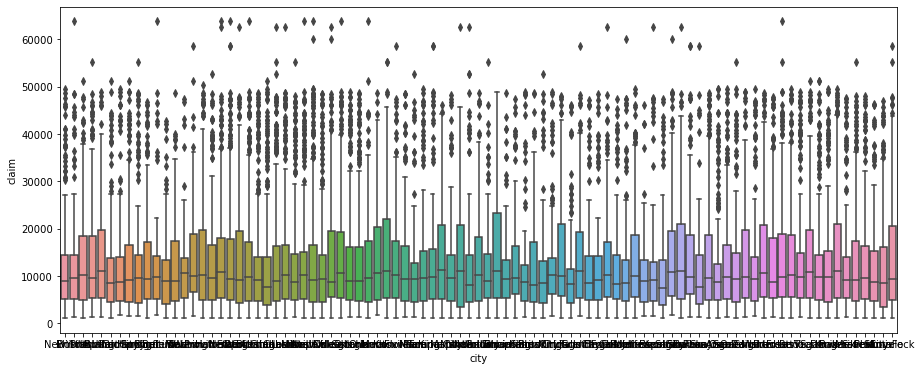

In [34]:
sns.boxplot(health.city,health.claim) # Unable to decode

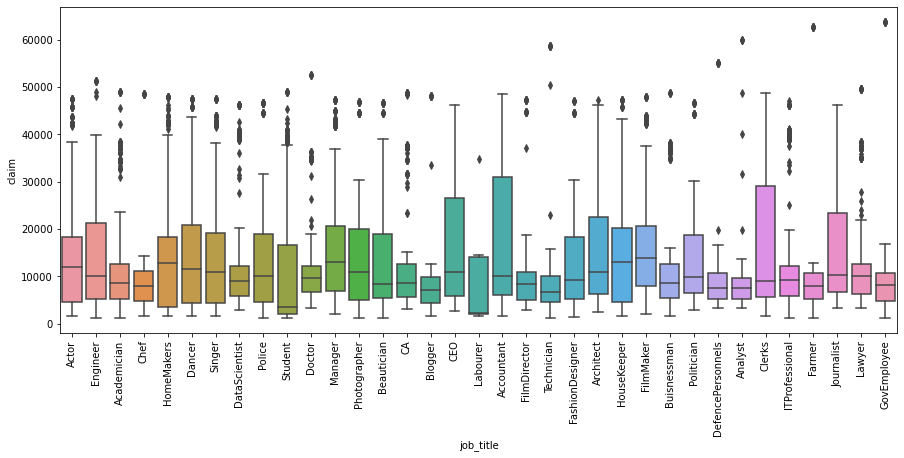

In [35]:
# Job Title vs Claim
sns.boxplot(health.job_title,health.claim)
plt.xticks(rotation=90)
plt.show()

In [40]:
health.job_title.unique()

array(['Actor', 'Engineer', 'Academician', 'Chef', 'HomeMakers', 'Dancer',
       'Singer', 'DataScientist', 'Police', 'Student', 'Doctor',
       'Manager', 'Photographer', 'Beautician', 'CA', 'Blogger', 'CEO',
       'Labourer', 'Accountant', 'FilmDirector', 'Technician',
       'FashionDesigner', 'Architect', 'HouseKeeper', 'FilmMaker',
       'Buisnessman', 'Politician', 'DefencePersonnels', 'Analyst',
       'Clerks', 'ITProfessional', 'Farmer', 'Journalist', 'Lawyer',
       'GovEmployee'], dtype=object)

In [41]:
# Bin the Job Title basis the Target

health.groupby('job_title')['claim'].describe()

,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
Academician,306.0,13097.379085,12504.444060,1121.9,5240.800,8538.30,12638.200,48885.1
Accountant,368.0,16320.152717,13925.395283,1627.3,6128.800,9957.70,30942.200,48549.2
Actor,720.0,13944.422917,11231.062831,1534.3,4673.400,11882.00,18310.700,47403.9
Analyst,255.0,8787.665098,7865.959422,3238.4,5267.800,7627.00,9625.900,60021.4
Architect,365.0,16710.670411,13374.433926,2457.5,6361.000,10825.30,22478.600,47352.4
Beautician,385.0,12809.675584,11206.231014,1261.9,5385.300,8310.80,18903.500,46718.2
Blogger,281.0,8577.109253,8750.659925,1622.2,4402.200,7046.70,9880.100,48173.4
Buisnessman,242.0,14248.269421,13323.382176,1631.7,5328.625,8534.70,12629.900,48824.5
CA,272.0,14072.912868,12888.841063,3171.6,5594.900,8522.00,12622.200,48673.6


In [42]:
# Bins are always preferred over encoding techniques

In [43]:
# Target Encoding basis Median
mapped = health.groupby('job_title')['claim'].median().to_dict()

In [45]:
# Replacing job titles with median values
health['job_title']=health.job_title.map(mapped)

In [46]:
health

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,11882.00,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,10097.00,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,8538.30,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,8026.70,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,12914.00,1731.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,39.0,male,49,28.3,NoDisease,1,1,Florence,54,1,0,13937.70,21082.2
14996,39.0,male,74,29.6,NoDisease,4,0,Miami,64,1,0,3597.60,7512.3
14997,20.0,male,62,33.3,NoDisease,0,0,Tampa,52,1,0,9290.10,1391.5
14998,52.0,male,88,36.7,NoDisease,0,0,PanamaCity,70,1,0,7933.15,9144.6


In [48]:
# Target Encoding basis Median - City
mapped = health.groupby(health.city)['claim'].median().to_dict()

In [49]:
# replace city with median claim
health['city'] = health.city.map(mapped)

In [50]:
health.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,8948.10,72,0,0,11882.0,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,9554.35,78,1,1,10097.0,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,10247.90,88,1,1,8538.3,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,9510.25,72,1,0,8026.7,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,10968.80,82,1,0,12914.0,1731.7


In [66]:
# Missing values
health.isnull().sum()[health.isnull().sum()!=0]

Series([], dtype: int64)

In [54]:
# Pull the df where the age is missing
health.loc[health.age.isnull()].head(2)

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
76,NaN,female,88,29.6,NoDisease,1,0,10597.4,78,0,0,11013.7,3947.4
82,NaN,female,64,24.6,NoDisease,2,0,9861.0,70,0,1,9030.3,4529.5


In [55]:
health.loc[(health.sex=='male')&(health.age.isnull()),'age']=40

In [56]:
health.loc[(health.sex=='female')&(health.age.isnull()),'age']=40

In [61]:
health.loc[(health.sex=='male')&(health.bmi.isnull())]

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
8,63.0,male,55,NaN,NoDisease,0,0,9557.85,70,1,0,11454.00,13390.6
60,41.0,male,82,NaN,NoDisease,2,0,8283.70,62,1,0,9890.55,7256.7
63,45.0,male,60,NaN,NoDisease,2,0,8871.20,86,1,0,11882.00,8413.5
136,27.0,male,90,NaN,NoDisease,3,0,9625.35,68,1,0,10051.80,4260.7
144,37.0,male,69,NaN,NoDisease,3,0,10107.20,82,1,0,9890.55,6796.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14884,45.0,male,60,NaN,NoDisease,2,0,9861.90,86,1,0,11882.00,8413.5
14894,54.0,male,70,NaN,NoDisease,0,0,9625.35,85,1,1,12914.00,24476.5
14896,27.0,male,90,NaN,NoDisease,3,0,9300.15,68,1,0,10051.80,4260.7
14899,25.0,male,63,NaN,NoDisease,0,0,9163.40,64,1,0,9290.10,2727.4


In [62]:
health.groupby(['sex','regular_ex'])['bmi'].describe()

count       mean       std   min   25%   50%   75%   max
sex    regular_ex                                                           
female 0           5714.0  29.820791  6.054685  16.8  25.4  28.8  33.8  48.1
       1           1551.0  29.761702  5.721222  17.3  25.5  29.0  33.3  49.6
male   0           5211.0  31.024717  6.312529  16.0  26.1  31.1  35.5  52.6
       1           1568.0  29.869452  5.866444  16.8  25.5  29.3  34.1  53.1

In [63]:
health.loc[(health.bmi.isnull())&
          (health.sex=='male')&
          (health.regular_ex==0),
          'bmi']=31.1

health.loc[(health.bmi.isnull())&
          (health.sex=='female')&
          (health.regular_ex==0),
          'bmi']=28.8

health.loc[(health.bmi.isnull())&
          (health.sex=='male')&
          (health.regular_ex==1),
          'bmi']=29.3

health.loc[(health.bmi.isnull())&
          (health.sex=='female')&
          (health.regular_ex==1),
          'bmi']=29.0

In [67]:
health.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,8948.10,72,0,0,11882.0,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,9554.35,78,1,1,10097.0,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,10247.90,88,1,1,8538.3,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,9510.25,72,1,0,8026.7,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,10968.80,82,1,0,12914.0,1731.7


In [73]:
# Blood pressure

health.loc[health.bloodpressure==0]

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
10,51.0,female,50,33.0,EyeDisease,0,1,9704.7,0,1,0,10051.8,44400.4
12,19.0,male,45,24.6,NoDisease,1,0,8871.2,0,0,1,3597.6,1837.2
15,56.0,male,67,40.3,NoDisease,0,0,10214.6,0,1,0,10097.0,10602.4
24,21.0,male,45,25.7,NoDisease,4,1,10107.2,0,1,0,11882.0,17942.1
45,56.0,male,67,40.3,NoDisease,0,0,10097.0,0,1,0,10097.0,10602.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14851,20.0,male,60,29.7,NoDisease,0,0,10214.6,0,0,0,12949.2,1769.5
14853,56.0,male,67,40.3,NoDisease,0,0,10792.0,0,1,0,10097.0,10602.4
14934,51.0,male,59,31.6,NoDisease,0,0,8932.1,0,1,0,8233.1,9174.1
14977,45.0,female,84,29.0,NoDisease,1,1,9127.5,0,1,1,9222.4,39725.5


In [74]:
health.groupby(['smoker','sex','regular_ex'])['bloodpressure'].describe()

count       mean        std  min   25%   50%  \
smoker sex    regular_ex                                                  
0      female 0           4961.0  68.704092  17.388583  0.0  62.0  70.0   
              1           1396.0  69.222063  21.093633  0.0  64.0  72.0   
       male   0           4279.0  67.004674  21.073381  0.0  62.0  70.0   
              1           1392.0  72.466236  18.676989  0.0  68.0  74.0   
1      female 0           1027.0  72.188900  15.152228  0.0  66.0  72.0   
              1            268.0  65.626866  28.210730  0.0  62.0  72.0   
       male   0           1371.0  67.175055  18.409693  0.0  62.0  70.0   
              1            306.0  68.196078  24.781817  0.0  67.0  73.0   

                            75%    max  
smoker sex    regular_ex                
0      female 0           78.00  122.0  
              1           80.00  110.0  
       male   0           78.00  122.0  
              1           84.00  114.0  
1      female 0           81.50  110.0  
              1           80.25  108.0  
       male   0           78.00  107.0  
              1           80.75  104.0

In [79]:
health.groupby(['hereditary_diseases'])['bloodpressure'].describe()

,count,mean,std,min,25%,50%,75%,max
hereditary_diseases,,,,,,,,
Alzheimer,144.0,72.652778,7.466774,58.0,68.00,72.0,78.00,88.0
Arthritis,96.0,66.677083,24.753307,0.0,66.00,69.0,82.00,98.0
Cancer,109.0,74.467890,20.465223,0.0,72.00,78.0,81.00,100.0
Diabetes,148.0,80.202703,13.890220,54.0,74.00,78.0,88.00,110.0
Epilepsy,84.0,76.523810,9.923170,44.0,66.00,74.0,85.25,90.0
EyeDisease,123.0,62.821138,25.282351,0.0,52.00,71.0,78.00,90.0
HeartDisease,93.0,69.053763,10.932963,50.0,62.00,66.0,76.00,86.0
High BP,69.0,70.115942,8.805974,60.0,64.00,72.0,72.00,88.0
NoDisease,13998.0,68.467138,19.506328,0.0,62.25,70.0,80.00,122.0


In [77]:
# Impute the Median for BloodPressure

labels = health.hereditary_diseases.unique()

for i in labels:
    health.loc[(health.hereditary_diseases==i)&
              (health.bloodpressure==0),
              'bloodpressure']=health.loc[(health.hereditary_diseases==i)&
              (health.bloodpressure==0),
              'bloodpressure'].median()

In [78]:
health.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,8948.10,72.0,0,0,11882.0,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,9554.35,78.0,1,1,10097.0,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,10247.90,88.0,1,1,8538.3,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,9510.25,72.0,1,0,8026.7,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,10968.80,82.0,1,0,12914.0,1731.7


# Feature Engineering

* Target Encoded - Job Title, City
* Basis BMI, create a new var - Obese and not obese
* Diseases - Convert them in Fatal and Non Fatal
* Height using Weight and BMI

In [80]:
# Creating height variable using BMI and weight
health['height'] = np.sqrt(health.weight/health.bmi)

In [82]:
# Fatal Diseases
health.hereditary_diseases.unique()

array(['NoDisease', 'Epilepsy', 'EyeDisease', 'Alzheimer', 'Arthritis',
       'HeartDisease', 'Diabetes', 'Cancer', 'High BP', 'Obesity'],
      dtype=object)

In [83]:
fatals = [ 'Alzheimer','HeartDisease', 'Diabetes', 'Cancer', 'High BP', 'Obesity']

In [84]:
def diseases(x):
    if x in fatals:
        return('Fatal')
    else:
        return('Non-Fatal')

In [85]:
health['disease_cat']= health.hereditary_diseases.apply(diseases)

<AxesSubplot:xlabel='disease_cat', ylabel='claim'>

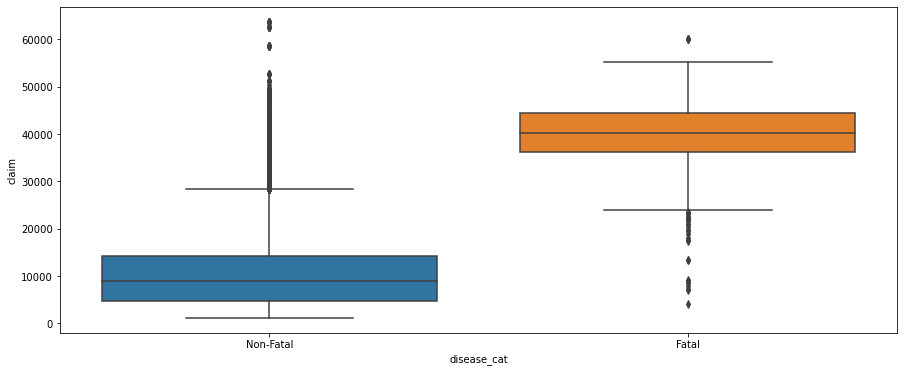

In [88]:
sns.boxplot(x= 'disease_cat',y='claim',data=health)

In [89]:
# Finding Normal,underweight,overweight,obese

# Above 24.9 is obese
# underweight: below 18.5
# 18.5-24.9 : normal
# 24.9-30 : overweight
# above 30 : obese

def findingobese(x):
    if x < 18.5:
        return('Underweight')
    elif(x<24.9):
        return('Normal')
    elif(x<30):
        return('Overweight')
    else:
        return('Obese')


In [90]:
health['bmi_category'] = health.bmi.apply(findingobese)
health

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim,height,disease_cat,bmi_category
0,60.0,male,64,24.3,NoDisease,1,0,8948.10,72.0,0,0,11882.00,13112.6,1.622882,Non-Fatal,Normal
1,49.0,female,75,22.6,NoDisease,1,0,9554.35,78.0,1,1,10097.00,9567.0,1.821698,Non-Fatal,Normal
2,32.0,female,64,17.8,Epilepsy,2,1,10247.90,88.0,1,1,8538.30,32734.2,1.896182,Non-Fatal,Underweight
3,61.0,female,53,36.4,NoDisease,1,1,9510.25,72.0,1,0,8026.70,48517.6,1.206666,Non-Fatal,Obese
4,19.0,female,50,20.6,NoDisease,0,0,10968.80,82.0,1,0,12914.00,1731.7,1.557942,Non-Fatal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,39.0,male,49,28.3,NoDisease,1,1,9327.65,54.0,1,0,13937.70,21082.2,1.315845,Non-Fatal,Overweight
14996,39.0,male,74,29.6,NoDisease,4,0,9290.10,64.0,1,0,3597.60,7512.3,1.581139,Non-Fatal,Overweight
14997,20.0,male,62,33.3,NoDisease,0,0,9520.40,52.0,1,0,9290.10,1391.5,1.364501,Non-Fatal,Obese
14998,52.0,male,88,36.7,NoDisease,0,0,9861.90,70.0,1,0,7933.15,9144.6,1.548490,Non-Fatal,Obese


<AxesSubplot:xlabel='bmi_category', ylabel='claim'>

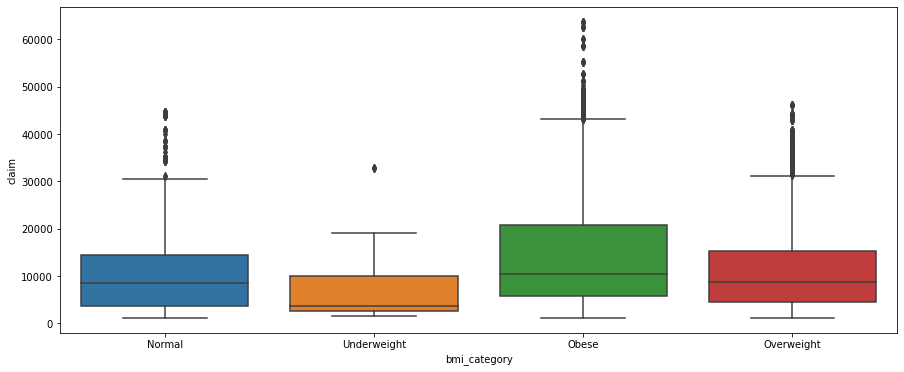

In [91]:
# Checking effect using boxplot
sns.boxplot(x = 'bmi_category',y='claim',data=health)

In [92]:
# Drop the Hereditary disease
health.drop(columns='hereditary_diseases',axis=1,inplace=True)

In [93]:
health.head()

,age,sex,weight,bmi,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim,height,disease_cat,bmi_category
0,60.0,male,64,24.3,1,0,8948.10,72.0,0,0,11882.0,13112.6,1.622882,Non-Fatal,Normal
1,49.0,female,75,22.6,1,0,9554.35,78.0,1,1,10097.0,9567.0,1.821698,Non-Fatal,Normal
2,32.0,female,64,17.8,2,1,10247.90,88.0,1,1,8538.3,32734.2,1.896182,Non-Fatal,Underweight
3,61.0,female,53,36.4,1,1,9510.25,72.0,1,0,8026.7,48517.6,1.206666,Non-Fatal,Obese
4,19.0,female,50,20.6,0,0,10968.80,82.0,1,0,12914.0,1731.7,1.557942,Non-Fatal,Normal


# Statistical Analysis

* Num vs Num - T-test
* Between Cat vs Num(tgt) - Anova


Note: There is a Litmus test for these tests to be applied.
* Litmus Test is normality and Equality of Variance Test.
* If these litmus tests fail, then we cannot apply the Parametric Tests (t-Test and Anova)
* We will have to apply the Non Parametric Tests(mannwhitneyu, kruskal)

In [95]:
health.select_dtypes(include = np.number).columns

Index(['age', 'weight', 'bmi', 'no_of_dependents', 'smoker', 'city',
       'bloodpressure', 'diabetes', 'regular_ex', 'job_title', 'claim',
       'height'],
      dtype='object')

In [100]:
num_cols = ['age', 'weight', 'bmi', 'no_of_dependents', 'smoker', 'city',
       'bloodpressure', 'diabetes', 'regular_ex', 'job_title', 'claim',
       'height']

import scipy.stats as stats

for i in num_cols:
    print('Pvalue for',i,'is',stats.jarque_bera(health.loc[:,i])[1])
    
    
# Since Pvalue < 0.05 , we reject the Ho meaning data is not normal.

Pvalue for age is 0.0
Pvalue for weight is 0.0
Pvalue for bmi is 0.0
Pvalue for no_of_dependents is 0.0
Pvalue for smoker is 0.0
Pvalue for city is 0.000249109703297723
Pvalue for bloodpressure is 0.0
Pvalue for diabetes is 0.0
Pvalue for regular_ex is 0.0
Pvalue for job_title is 0.0
Pvalue for claim is 0.0
Pvalue for height is 0.0


In [103]:
# Mannwhitney u
# Ho: That the feature does not carry any significance for the target
# Ha: That the feature is a significance Var for the Target.


for i in num_cols:
    print(i, stats.mannwhitneyu(health.loc[:, i],health.claim))
    
# Conc: Since the Pvalue for City and Job_title > 0.05, we fail to reject the claim
# It means these variables have no significance for the target
# Which leads to dropping these two variables before final model building.

age MannwhitneyuResult(statistic=0.0, pvalue=0.0)
weight MannwhitneyuResult(statistic=0.0, pvalue=0.0)
bmi MannwhitneyuResult(statistic=0.0, pvalue=0.0)
no_of_dependents MannwhitneyuResult(statistic=0.0, pvalue=0.0)
smoker MannwhitneyuResult(statistic=0.0, pvalue=0.0)
city MannwhitneyuResult(statistic=112209519.0, pvalue=0.3492643893062706)
bloodpressure MannwhitneyuResult(statistic=0.0, pvalue=0.0)
diabetes MannwhitneyuResult(statistic=0.0, pvalue=0.0)
regular_ex MannwhitneyuResult(statistic=0.0, pvalue=0.0)
job_title MannwhitneyuResult(statistic=111608329.0, pvalue=0.11721655865484437)
claim MannwhitneyuResult(statistic=112500000.0, pvalue=0.49999973404280407)
height MannwhitneyuResult(statistic=0.0, pvalue=0.0)


In [110]:
# Similarity test to Anova - Kruskall wallis Test


health.disease_cat.unique()

fatal = health.loc[health.disease_cat=='Fatal','claim']
nfatal = health.loc[health.disease_cat=='Non-Fatal','claim']

stats.kruskal(fatal, nfatal)
#check for all variables

KruskalResult(statistic=1618.6109621479138, pvalue=0.0)

In [112]:
health.disease_cat.value_counts()

Non-Fatal    14301
Fatal          699
Name: disease_cat, dtype: int64

In [113]:
fatal = health.loc[health.regular_ex==0,'claim']
nfatal = health.loc[health.regular_ex==1,'claim']

stats.kruskal(fatal, nfatal)

KruskalResult(statistic=0.013707241603973554, pvalue=0.9067982990532341)

In [114]:
# Regular Ex should be dropped

In [115]:
#Drop the Insignificant Variables
finaldata = health.drop(['job_title','city','regular_ex'],axis=1)

In [116]:
# apply pd.get_dummies - one hot encoding
finalcut = pd.get_dummies(finaldata,drop_first=True)

In [117]:
finalcut

,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,claim,height,sex_male,disease_cat_Non-Fatal,bmi_category_Obese,bmi_category_Overweight,bmi_category_Underweight
0,60.0,64,24.3,1,0,72.0,0,13112.6,1.622882,1,1,0,0,0
1,49.0,75,22.6,1,0,78.0,1,9567.0,1.821698,0,1,0,0,0
2,32.0,64,17.8,2,1,88.0,1,32734.2,1.896182,0,1,0,0,1
3,61.0,53,36.4,1,1,72.0,1,48517.6,1.206666,0,1,1,0,0
4,19.0,50,20.6,0,0,82.0,1,1731.7,1.557942,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,39.0,49,28.3,1,1,54.0,1,21082.2,1.315845,1,1,0,1,0
14996,39.0,74,29.6,4,0,64.0,1,7512.3,1.581139,1,1,0,1,0
14997,20.0,62,33.3,0,0,52.0,1,1391.5,1.364501,1,1,1,0,0
14998,52.0,88,36.7,0,0,70.0,1,9144.6,1.548490,1,1,1,0,0


# Model Building

* Split the data in Train and Test
* Statistical Model
* Ridge, Lasso, Elastic Net Model
* Interaction Effect Model
* SGD Model
* KFold Cross Validation Model

In [119]:
# Split the data in Train and Test

X = finalcut.drop('claim',axis=1)
y = finalcut.claim

from sklearn.model_selection import KFold, train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state = 123)

In [120]:
# Import Linear Regression and Other Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from statsmodels.api import OLS, add_constant
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [123]:
# Linear Regression - Statistical Model

temp_xtrain = add_constant(xtrain)
temp_xtest = add_constant(xtest)

model = OLS(ytrain, temp_xtrain).fit()
#model.summary()

prediction_tr = model.predict(temp_xtrain)
prediction_test = model.predict(temp_xtest)

rmse_train = np.sqrt(mean_squared_error(ytrain, prediction_tr))
rmse_test = np.sqrt(mean_squared_error(ytest, prediction_test))
print('RMSE Train:',rmse_train)
print('RMSE Test:', rmse_test)


#MAE
mae = mean_absolute_error(ytest, prediction_test)
print('MAE:',mae)

RMSE Train: 6098.193621211217
RMSE Test: 6132.680377761734
MAE: 4059.0959426877002


In [124]:
# Ridge Regression

from sklearn.model_selection import GridSearchCV

ridge = Ridge()
params = ({'alpha':[0.001,0.01,0.1,0.5,0.9,1,2,3,5,7,9,10]})

grid = GridSearchCV(estimator=ridge, param_grid= params, cv =5)
grid.fit(X,y)

print(grid.best_params_)

{'alpha': 3}


In [129]:
ridge = Ridge(alpha=3,normalize=True)



model = ridge.fit(xtrain, ytrain)


prediction_tr = model.predict(xtrain)
prediction_test = model.predict(xtest)

rmse_train = np.sqrt(mean_squared_error(ytrain, prediction_tr))
rmse_test = np.sqrt(mean_squared_error(ytest, prediction_test))
print('RMSE Train:',rmse_train)
print('RMSE Test:', rmse_test)


#MAE
mae = mean_absolute_error(ytest, prediction_test)
print('MAE:',mae)

# RMSE of 7000 tells us that the model predictions is deviating by 6000 dollars

RMSE Train: 9448.760915543939
RMSE Test: 9767.54550605853
MAE: 7302.138870911964


In [132]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor()
model = gbm.fit(xtrain, ytrain)

prediction_tr = model.predict(xtrain)
prediction_test = model.predict(xtest)

rmse_train = np.sqrt(mean_squared_error(ytrain, prediction_tr))
rmse_test = np.sqrt(mean_squared_error(ytest, prediction_test))

print('RMSE train:',rmse_train)
print('RMSE test:',rmse_test)

#MAE
mae = mean_absolute_error(ytest, prediction_test)
print('MAE:',mae)

RMSE train: 4439.719015432834
RMSE test: 4518.9203578065635
MAE: 2696.8268488047015


In [133]:
# KFold 
lr = LinearRegression()
rmse = []
kfold = KFold(n_splits=5,shuffle=True, random_state=123)

for train_index, test_index in kfold.split(X, y):
    xtrain = X.loc[train_index]
    ytrain = y.loc[train_index]
    xtest = X.loc[test_index]
    ytest = y.loc[test_index]
    predictions = gbm.fit(xtrain, ytrain).predict(xtest)
    rmse.append(np.sqrt(mean_squared_error(ytest, predictions)))
    
np.mean(rmse)

4554.310032905218